## Visualize plate 4 correlations

In plate 4, we treated Schwann cells with two different siRNA constructs targetting NF1 at several different doses.

Here, we visualize the pairwise correlations between:

- NF1 construct A (replicability of construct A)
- NF1 construct B (replicability of construct B)
- NF1 construct A vs NF1 construct B (comparison to determine off-target effects)
- Controls:
    - Constructs vs. scramble (To determine if the phenotypic impact of NF1 targeted RNAi is more consistent than what is expected by chance)
    - Constructs vs. no treatment (To determine if the NF1 targeted RNAi induces a consistent phenotype)
    - Scramble vs. scramble (To determine if the scramble construct induced a consistent phenotype)
    - No treatment vs. no treatment (To determine the expected range of correlations across all treatments)
    - Scramble vs. no treatment (To determine if the scramble RNAi induces a consistent phenotype)

We plot two figures:

1. Boxplot overlayed with jitter plot showing the distribution of pairwise correlations across constructs **and across doses**
2. Boxplot overlayed with jitter plot showing only the top dose (focused figure for grant)

In [1]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(ggplot2))

In [2]:
# Set seed to maintain random point jittering (geom_jitter)
set.seed(1234)

In [3]:
# Define I/O
correlation_dir <- file.path(
    "..",
    "0.data_analysis",
    "construct_phenotypic_expression_plate_4_fs_data",
    "median_correlation_relationships",
    "post_fs_aggregation_correlations",
    "data"
)

correlation_file <- file.path(correlation_dir, "correlation_data.tsv")

platemap_dir <- file.path(
    "..",
    "..",
    "nf1_cellpainting_data",
    "0.download_data",
    "metadata"
)

platemap_file <- file.path(platemap_dir, "platemap_NF1_plate4.csv")

output_boxplot_file <- file.path("figures", "plate4_bulk_correlation_boxplot.png")
output_grant_file <- file.path("figures", "plate4_grant_boxplot.png")

In [4]:
# Set plot defaults
construct_labels <- c(
    "NF1 Construct 1" = "NF1 A replicates",
    "NF1 Construct 1 Scramble" = "NF1 A vs. scramble",
    "NF1 Construct 1 No treatment" = "NF1 A vs. no treatment",
    "NF1 Construct 2" = "NF1 B replicates",
    "NF1 Construct 2 Scramble" = "NF1 B vs. scramble",
    "NF1 Construct 2 No treatment" = "NF1 B vs. no treatment",
    "Construct comparison" = "NF1 A vs B",
    "Scramble comparison" = "Scramble",
    "No treatment comparison" = "No treatment",
    "Scramble No treatment" = "Scramble vs. No treatment"
)

construct_colors <- c(
    "NF1 Construct 1" = "#1f78b4",
    "NF1 Construct 1 Scramble" = "#a6cee3",
    "NF1 Construct 1 No treatment" = "pink",
    "NF1 Construct 2" = "#33a02c",
    "NF1 Construct 2 Scramble" = "#b2df8a",
    "NF1 Construct 2 No treatment" = "red",
    "Construct comparison" = "darkgrey",
    "Scramble comparison" = "lightgrey",
    "No treatment comparison" = "white",
    "Scramble No treatment" = "lightyellow"
)

grant_construct_labels <- c(
    "A vs. B" = "A vs. B",
    "Replicate" = "Replicate",
    "Scramble" = "Scramble",
    "No treatment" = "No treatment",
    "Scramble vs.\nscramble" = "Scramble vs.\nscramble",
    "No treatment vs.\nno treatment" = "No treatment vs.\nno treatment",
    "Scramble vs.\nno treatment" = "Scramble vs.\nno treatment"
)

grant_construct_colors <- c(
    "A vs. B" = "#33a02c",
    "Replicate" = "#1f78b4",
    "Scramble" = "#a6cee3",
    "No treatment" = "pink",
    "Scramble vs.\nscramble" = "lightgrey",
    "No treatment vs.\nno treatment" = "white",
    "Scramble vs.\nno treatment" = "lightyellow"
)

figure_theme <- theme(
    legend.spacing.y = unit(0.1, "cm"),
    legend.box.spacing = unit(0.5, "cm"),
    legend.key.size = unit(1, "lines"),
    legend.key.width = unit(1, "lines"),
    axis.title = element_text(size = 16),
    axis.text = element_text(size = 14),
    strip.background = element_rect(
        colour = "black",
        fill = "#fdfff4"
    )
)

In [5]:
# Load and process data for plotting
correlation_df <- readr::read_tsv(
    correlation_file,
    col_types = c(
        first_well = "c",
        second_well = "c",
        pearsons_coef = "d",
        first_construct = "c",
        second_construct = "c",
        concentration = "c",
        comparison = "c"
    )
) %>%
    dplyr::mutate(construct_comparison = paste(first_construct, second_construct, sep = "__")) %>%
    dplyr::mutate(construct_y_group = first_construct, construct_colors = construct_comparison)

correlation_df$concentration <- factor(
    correlation_df$concentration,
    levels = c("0.001", "0.005", "0.01", "0.05", "0.1")
)

correlation_df$construct_comparison <- dplyr::recode(
    correlation_df$construct_comparison,
    "NF1 Target 1__NF1 Target 1" = "NF1 Construct 1",
    "NF1 Target 2__NF1 Target 2" = "NF1 Construct 2",
    "NF1 Target 1__no_treatment" = "NF1 Construct 1 No treatment",
    "NF1 Target 2__no_treatment" = "NF1 Construct 2 No treatment",
    "NF1 Target 1__Scramble" = "NF1 Construct 1 Scramble",
    "NF1 Target 2__Scramble" = "NF1 Construct 2 Scramble",
    "NF1 Target 1__NF1 Target 2" = "Construct comparison",
    "Scramble__Scramble" = "Scramble comparison",
    "no_treatment__no_treatment" = "No treatment comparison",
    "Scramble__no_treatment" = "Scramble No treatment"
)

correlation_df[correlation_df$construct_comparison == "Construct comparison", "construct_y_group"] = "NF1 A vs. NF1 B"

correlation_df[correlation_df$construct_comparison == "Scramble comparison", "construct_y_group"] = "Other control"
correlation_df[correlation_df$construct_comparison == "No treatment comparison", "construct_y_group"] = "Other control"
correlation_df[correlation_df$construct_comparison == "Scramble No treatment", "construct_y_group"] = "Other control"

correlation_df[correlation_df$construct_comparison == "NF1 Construct 1", "construct_colors"] = "Replicate"
correlation_df[correlation_df$construct_comparison == "NF1 Construct 1 Scramble", "construct_colors"] = "Scramble"
correlation_df[correlation_df$construct_comparison == "NF1 Construct 1 No treatment", "construct_colors"] = "No treatment"
correlation_df[correlation_df$construct_comparison == "NF1 Construct 2", "construct_colors"] = "Replicate"
correlation_df[correlation_df$construct_comparison == "NF1 Construct 2 Scramble", "construct_colors"] = "Scramble"
correlation_df[correlation_df$construct_comparison == "NF1 Construct 2 No treatment", "construct_colors"] = "No treatment"
correlation_df[correlation_df$construct_comparison == "Construct comparison", "construct_colors"] = "A vs. B"

correlation_df[correlation_df$construct_comparison == "Scramble comparison", "construct_colors"] = "Scramble vs.\nscramble"
correlation_df[correlation_df$construct_comparison == "No treatment comparison", "construct_colors"] = "No treatment vs.\nno treatment"
correlation_df[correlation_df$construct_comparison == "Scramble No treatment", "construct_colors"] = "Scramble vs.\nno treatment"

correlation_df$construct_colors <- factor(
    correlation_df$construct_colors,
    levels = c(
        "A vs. B",
        "Replicate",
        "Scramble",
        "No treatment",
        "Scramble vs.\nscramble",
        "No treatment vs.\nno treatment",
        "Scramble vs.\nno treatment"
    )
)

# Remove all wells that contain Null genotype cells
platemap_df <- readr::read_csv(platemap_file, show_col_types = FALSE)

null_wells <- platemap_df %>%
    dplyr::filter(genotype == "Null") %>%
    dplyr::pull(well_position)

correlation_df <- correlation_df %>%
    dplyr::filter(!(first_well %in% !!null_wells)) %>%
    dplyr::filter(!(second_well %in% !!null_wells))

print(dim(correlation_df))
head(correlation_df, 3)

[1] 966  10


first_well,second_well,pearsons_coef,first_construct,second_construct,concentration,comparison,construct_comparison,construct_y_group,construct_colors
<chr>,<chr>,<dbl>,<chr>,<chr>,<fct>,<chr>,<chr>,<chr>,<fct>
B10,C10,0.2685709,NF1 Target 1,Scramble,0.005,different_construct,NF1 Construct 1 Scramble,NF1 Target 1,Scramble
B10,C4,0.2696963,NF1 Target 1,Scramble,0.005,different_construct,NF1 Construct 1 Scramble,NF1 Target 1,Scramble
B10,C7,0.1667248,NF1 Target 1,Scramble,0.005,different_construct,NF1 Construct 1 Scramble,NF1 Target 1,Scramble


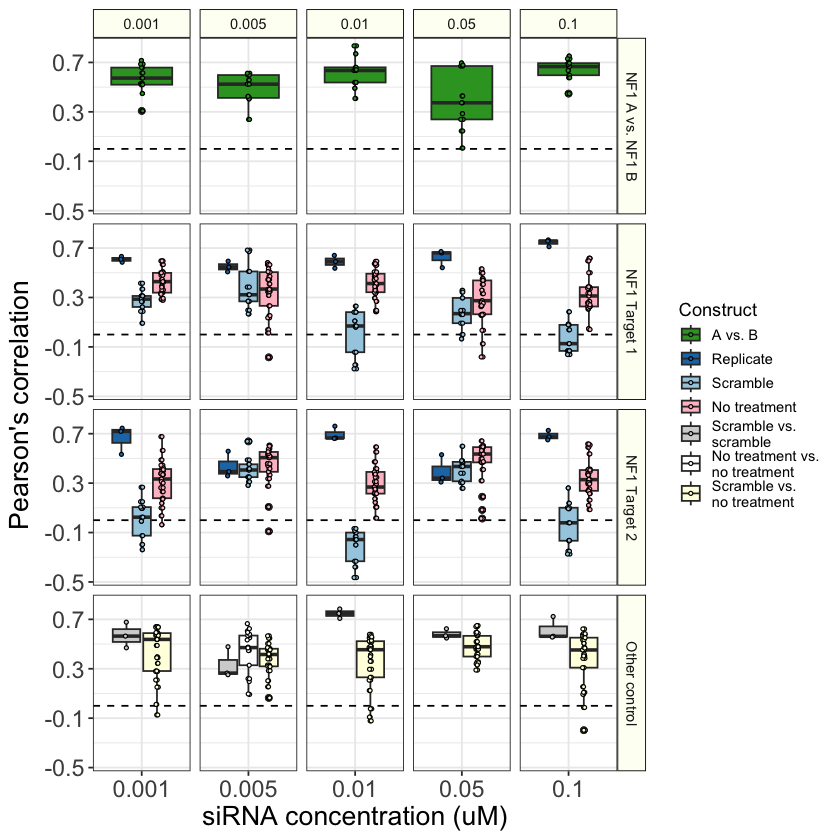

In [6]:
nf1_construct_gg <- (
    ggplot(correlation_df,
           aes(
               x = concentration,
               y = pearsons_coef,
               fill = construct_colors
           )
          )
    + geom_hline(yintercept = 0, linetype = "dashed")
    + geom_boxplot()
    + geom_jitter(
        aes(color = construct_colors),
        position = position_jitterdodge(
            jitter.width = 0.15,
            dodge.width = 0.75
        ),
        shape = 21,
        size = 0.8,
        color = "black"
    )
    + facet_grid("construct_y_group~concentration", scales = "free_x")
    + labs(
        x = "siRNA concentration (uM)",
        y = "Pearson's correlation"
    )
    + scale_color_manual(
        name = "Construct",
        labels = grant_construct_labels,
        values = grant_construct_colors
    )
    + scale_fill_manual(
        name = "Construct",
        labels = grant_construct_labels,
        values = grant_construct_colors
    )
    + theme_bw()
    + figure_theme
    + scale_y_continuous(breaks = seq(-0.5, 0.8, by = 0.4))
)

# Save figure
ggsave(
    output_boxplot_file,
    nf1_construct_gg,
    height = 6,
    width = 8,
    dpi = 500
)

nf1_construct_gg

## Grant figure

Highlight highest dose for simplicity and ease of understanding

In [7]:
grant_figure_df <- correlation_df %>%
    dplyr::filter(concentration == "0.1") %>%
    dplyr::mutate(
        construct_facet = first_construct,
        color_group = construct_comparison
    )

no_treatment_comparison_df <- correlation_df %>%
    dplyr::filter(construct_comparison == "No treatment comparison")

grant_figure_df <- dplyr::bind_rows(
    grant_figure_df,
    no_treatment_comparison_df
)

grant_figure_df$color_group <- paste(grant_figure_df$color_group)

grant_figure_df[grant_figure_df$construct_comparison == "Construct comparison", "construct_facet"] = "Construct\ncomparison\n(A vs. B)"
grant_figure_df[grant_figure_df$construct_comparison == "NF1 Construct 1", "construct_facet"] = "NF1\nconstruct A"
grant_figure_df[grant_figure_df$construct_comparison == "NF1 Construct 1 Scramble", "construct_facet"] = "NF1\nconstruct A"
grant_figure_df[grant_figure_df$construct_comparison == "NF1 Construct 1 No treatment", "construct_facet"] = "NF1\nconstruct A"
grant_figure_df[grant_figure_df$construct_comparison == "NF1 Construct 2", "construct_facet"] = "NF1\nconstruct B"
grant_figure_df[grant_figure_df$construct_comparison == "NF1 Construct 2 Scramble", "construct_facet"] = "NF1\nconstruct B"
grant_figure_df[grant_figure_df$construct_comparison == "NF1 Construct 2 No treatment", "construct_facet"] = "NF1\nconstruct B"
grant_figure_df[grant_figure_df$construct_comparison == "Scramble comparison", "construct_facet"] = "Other control"
grant_figure_df[grant_figure_df$construct_comparison == "No treatment comparison", "construct_facet"] = "Other control"
grant_figure_df[grant_figure_df$construct_comparison == "Scramble No treatment", "construct_facet"] = "Other control"

grant_figure_df[grant_figure_df$construct_comparison == "Construct comparison", "color_group"] = "A vs. B"
grant_figure_df[grant_figure_df$construct_comparison == "NF1 Construct 1", "color_group"] = "Replicate"
grant_figure_df[grant_figure_df$construct_comparison == "NF1 Construct 1 Scramble", "color_group"] = "Scramble"
grant_figure_df[grant_figure_df$construct_comparison == "NF1 Construct 1 No treatment", "color_group"] = "No treatment"
grant_figure_df[grant_figure_df$construct_comparison == "NF1 Construct 2", "color_group"] = "Replicate"
grant_figure_df[grant_figure_df$construct_comparison == "NF1 Construct 2 Scramble", "color_group"] = "Scramble"
grant_figure_df[grant_figure_df$construct_comparison == "NF1 Construct 2 No treatment", "color_group"] = "No treatment"
grant_figure_df[grant_figure_df$construct_comparison == "Scramble comparison", "color_group"] = "Scramble vs.\nscramble"
grant_figure_df[grant_figure_df$construct_comparison == "No treatment comparison", "color_group"] = "No treatment vs.\nno treatment"
grant_figure_df[grant_figure_df$construct_comparison == "Scramble No treatment", "color_group"] = "Scramble vs.\nno treatment"

grant_figure_df$color_group <- factor(
    grant_figure_df$color_group,
    levels = c(
        "A vs. B",
        "Replicate",
        "Scramble",
        "No treatment",
        "Scramble vs.\nscramble",
        "No treatment vs.\nno treatment",
        "Scramble vs.\nno treatment"
    )
)

head(grant_figure_df)

first_well,second_well,pearsons_coef,first_construct,second_construct,concentration,comparison,construct_comparison,construct_y_group,construct_colors,construct_facet,color_group
<chr>,<chr>,<dbl>,<chr>,<chr>,<fct>,<chr>,<chr>,<chr>,<fct>,<chr>,<fct>
E2,F2,0.18412747,NF1 Target 1,Scramble,0.1,different_construct,NF1 Construct 1 Scramble,NF1 Target 1,Scramble,NF1 construct A,Scramble
E2,F5,0.08362546,NF1 Target 1,Scramble,0.1,different_construct,NF1 Construct 1 Scramble,NF1 Target 1,Scramble,NF1 construct A,Scramble
E2,F8,0.07842022,NF1 Target 1,Scramble,0.1,different_construct,NF1 Construct 1 Scramble,NF1 Target 1,Scramble,NF1 construct A,Scramble
E5,F2,0.03827877,NF1 Target 1,Scramble,0.1,different_construct,NF1 Construct 1 Scramble,NF1 Target 1,Scramble,NF1 construct A,Scramble
E5,F5,-0.13256934,NF1 Target 1,Scramble,0.1,different_construct,NF1 Construct 1 Scramble,NF1 Target 1,Scramble,NF1 construct A,Scramble
E5,F8,-0.13137062,NF1 Target 1,Scramble,0.1,different_construct,NF1 Construct 1 Scramble,NF1 Target 1,Scramble,NF1 construct A,Scramble


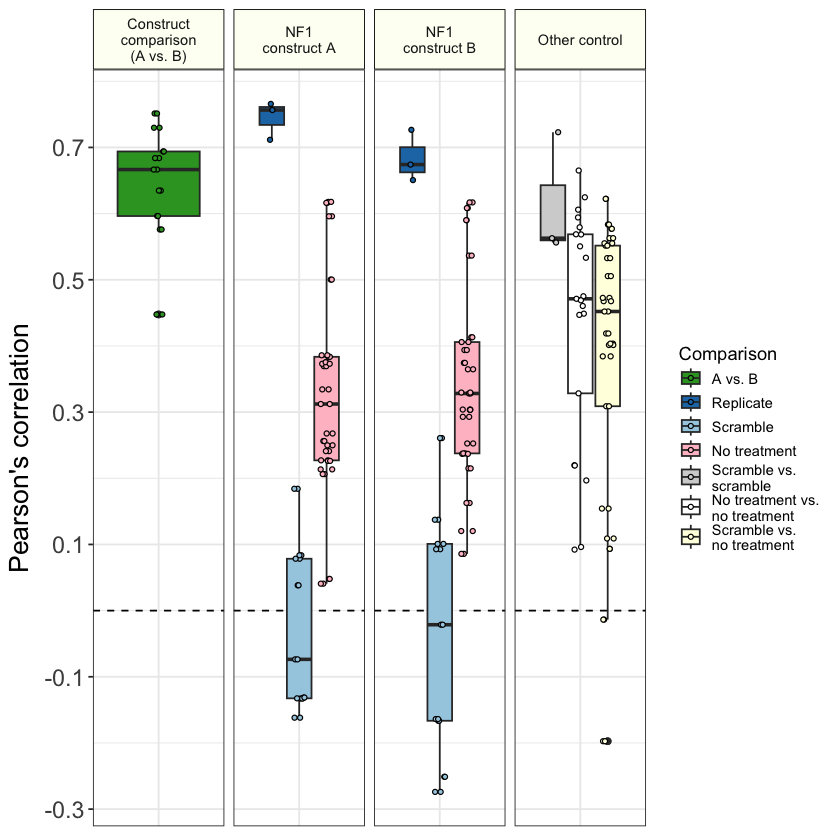

In [8]:
grant_figure_gg <- (
    ggplot(grant_figure_df,
           aes(
               x = construct_facet,
               y = pearsons_coef,
               fill = color_group
           )
          )
    + geom_hline(yintercept = 0, linetype = "dashed")
    + geom_boxplot()
    + geom_jitter(
        aes(color = color_group),
        position = position_jitterdodge(
            jitter.width = 0.5,
            dodge.width = 0.75
        ),
        size = 1.1,
        shape = 21,
        color = "black"
    )
    + facet_grid("~construct_facet", scales = "free_x")
    + labs(
        x = "siRNA concentration (uM)",
        y = "Pearson's correlation"
    )
    + scale_color_manual(
        name = "Comparison",
        labels = grant_construct_labels,
        values = grant_construct_colors
    )
    + scale_fill_manual(
        name = "Comparison",
        labels = grant_construct_labels,
        values = grant_construct_colors
    )
    + theme_bw()
    + figure_theme
    + theme(
        axis.title.x = element_blank(),
        axis.text.x = element_blank(),
        axis.ticks.x = element_blank()
    )
    + scale_y_continuous(breaks = seq(-0.5, 0.8, by = 0.2))
)

ggsave(
    output_grant_file,
    grant_figure_gg,
    height = 3,
    width = 6.5,
    dpi = 500
)

grant_figure_gg